# RNS Vectorization timing

This notebook parse `Result.csv`, output of `timing.c`.

You may need to install the json module:
```shell
pip install json
```

In [11]:
#pip install matplotlib

     |████████████████████████████████| 10.3 MB 361 kB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 11.4 MB/s eta 0:00:01
     |████████████████████████████████| 67 kB 509 kB/s  eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [28]:
import json
import matplotlib.pyplot as plt
f = open("Results.json", "r")
data = json.loads(f.read())

In [12]:
def pick(data: dict, operation: str, mode: str, measure: str):
    res = []
    for m in data[operation][mode]:
        res.append(m[measure])
    return min(res)

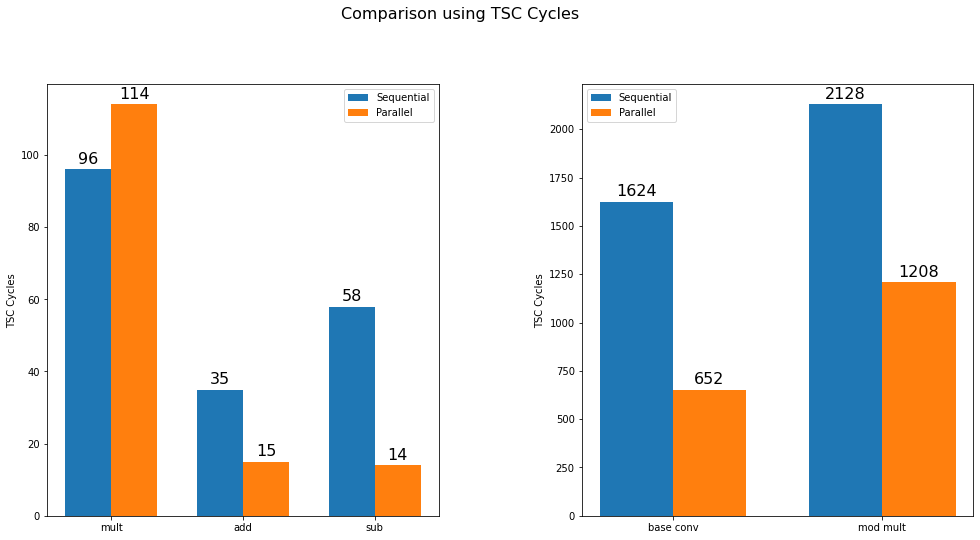

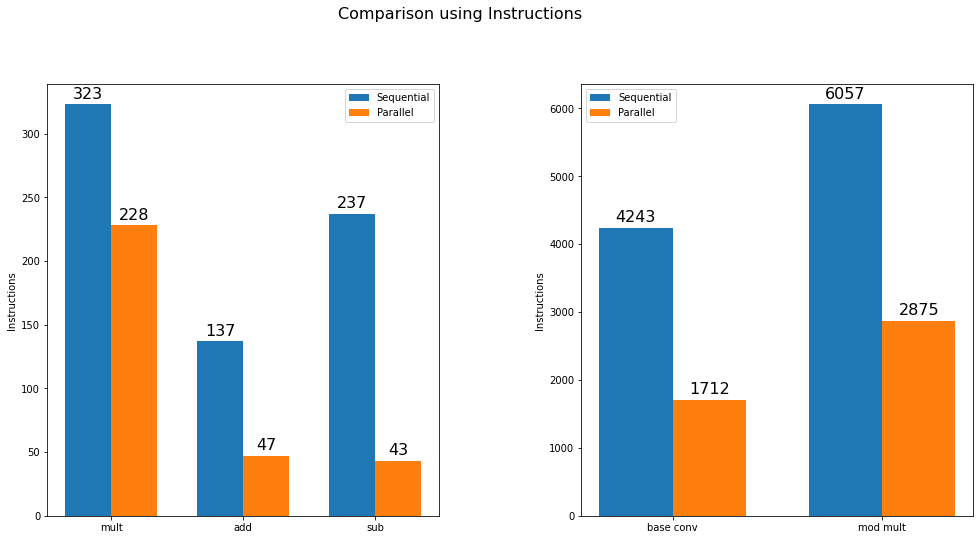

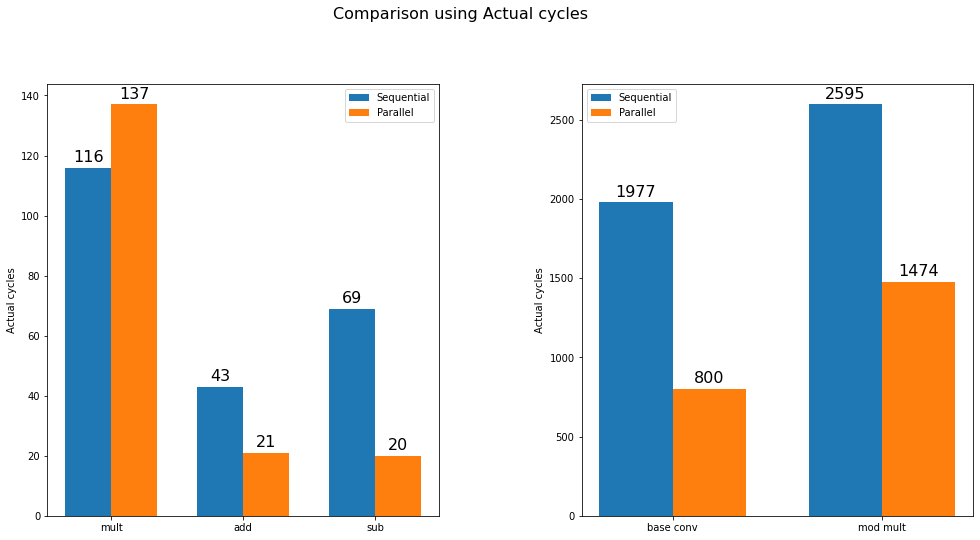

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

keys = ["multiplication", "addition", "substraction", "base_conversion", "modular_multiplication"]

for measure in ["TSC Cycles", "Instructions", "Actual cycles", "Reference cycles"]:

    labels = ['mult', 'add', 'sub', "base conv", "mod mult"]
    sequential = [pick(data, op, "sequential", measure) for op in keys]
    parallel = [pick(data, op, "parallel", measure) for op in keys]

    x = np.arange(3)  # the label locations
    x1 = np.arange(2)
    width = 0.35  # the width of the bars

    fig, (ax1, ax2) = plt.subplots(1, 2)
    
    rects1 = ax1.bar(x - width/2, sequential[:3], width, label='Sequential')
    rects2 = ax1.bar(x + width/2, parallel[:3], width, label='Parallel')

    rects3 = ax2.bar(x1 - width/2, sequential[3:], width, label='Sequential')
    rects4 = ax2.bar(x1 + width/2, parallel[3:], width, label='Parallel')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    fig.suptitle('Comparison using ' + measure, fontsize=16)

    ax1.set_ylabel(measure)
    ax1.set_xticks(x)
    ax1.set_xticklabels(labels[:3])
    ax1.legend()

    ax2.set_ylabel(measure)
    ax2.set_xticks(x1)
    ax2.set_xticklabels(labels[3:])
    ax2.legend()

    ax1.bar_label(rects1, padding=3, fontsize=16)
    ax1.bar_label(rects2, padding=3, fontsize=16)

    ax2.bar_label(rects3, padding=3, fontsize=16)
    ax2.bar_label(rects4, padding=3, fontsize=16)

    fig.tight_layout()
    fig.set_size_inches(15,8)
    

# Instructions per cycles
    
labels = ['mult', 'add', 'sub', "base conv", "mod mult"]

seq_instructions = [pick(data, op, "sequential", "Instructions") for op in keys]
seq_tsc_cycles = [pick(data, op, "sequential", "Actual cycles") for op in keys]

par_instructions = [pick(data, op, "parallel", "Instructions") for op in keys]
par_tsc_cycles = [pick(data, op, "parallel", "Actual cycles") for op in keys]

sequential_ipc = [i / j for i, j in zip(seq_instructions, seq_tsc_cycles)]
parallel_ipc = [i / j for i, j in zip(par_instructions, par_tsc_cycles)]
x = np.arange(len(labels))  # the label locations

fig, ax1 = plt.subplots()

rects1 = ax1.bar(x - width/2, sequential_ipc, width, label='Sequential')
rects2 = ax1.bar(x + width/2, parallel_ipc, width, label='Parallel')

    
ax1.set_ylabel(measure)
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.legend()


ax1.bar_label(rects1, padding=3, fontsize=16)
ax1.bar_label(rects2, padding=3, fontsize=16)

fig.tight_layout()
fig.set_size_inches(15,8)


plt.show()
